In [64]:
from sklearn.datasets import fetch_california_housing
cali=fetch_california_housing()


In [65]:
import pandas as pd
data=pd.DataFrame(cali.data, columns=cali.feature_names)
data['Price']=cali.target
data.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [66]:
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


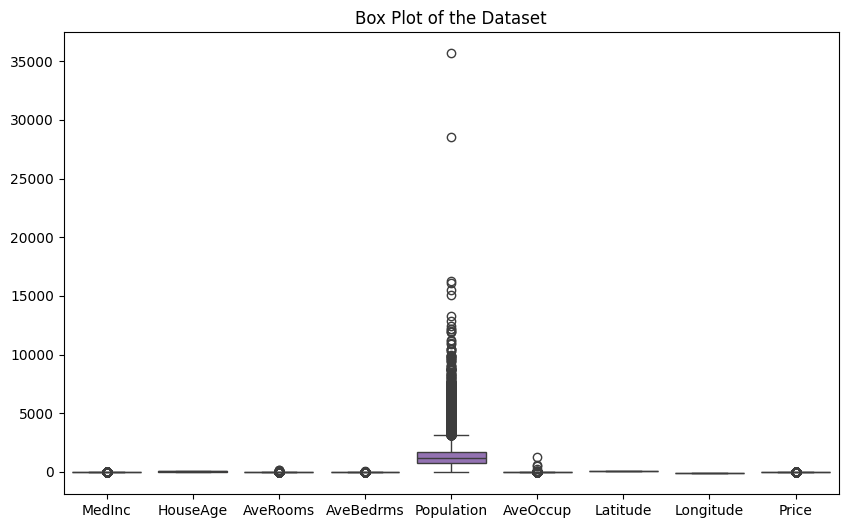

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box Plot of the Dataset')
plt.show()


In [69]:
import pandas as pd

# Assuming 'data' is your DataFrame
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


In [70]:
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


In [71]:
data_clean = data[~outliers.any(axis=1)]


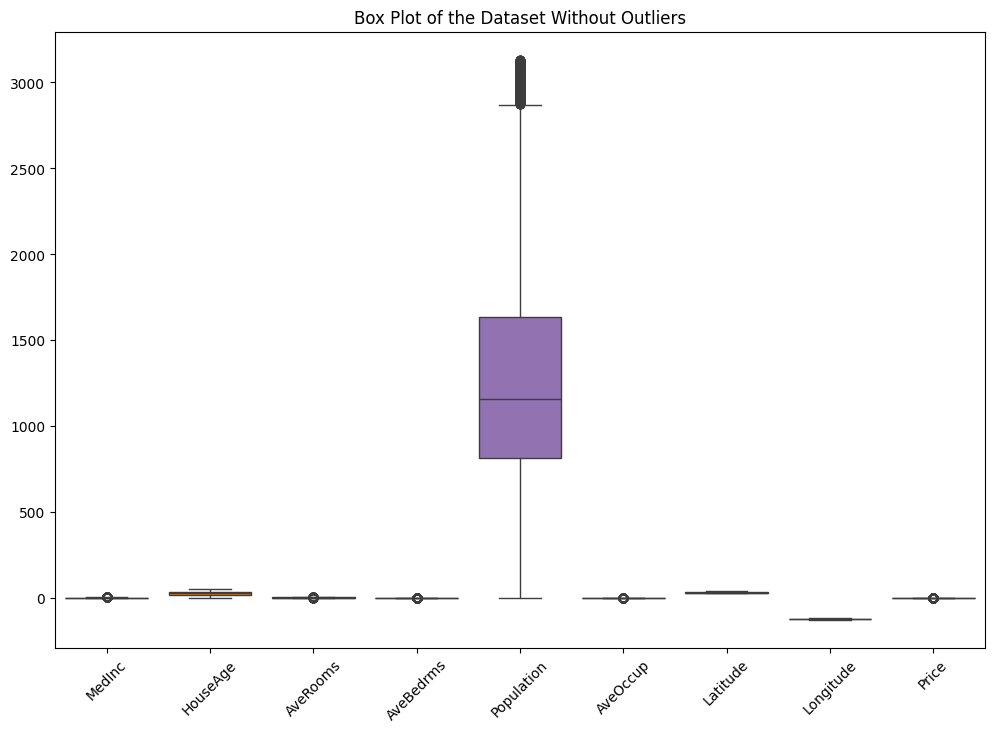

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the cleaned data with box plots for each column
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_clean)
plt.title('Box Plot of the Dataset Without Outliers')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


In [73]:
from sklearn.model_selection import train_test_split
X=data_clean.drop('Price',axis=1)
y=data_clean['Price']

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [75]:


import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.1540478747847182


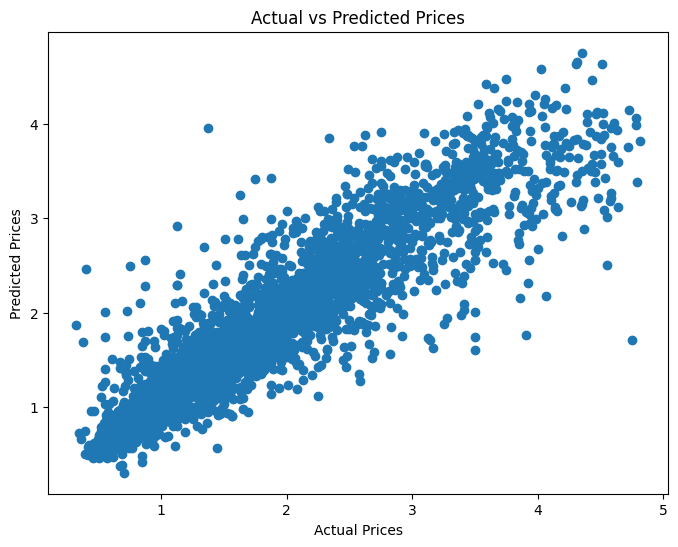

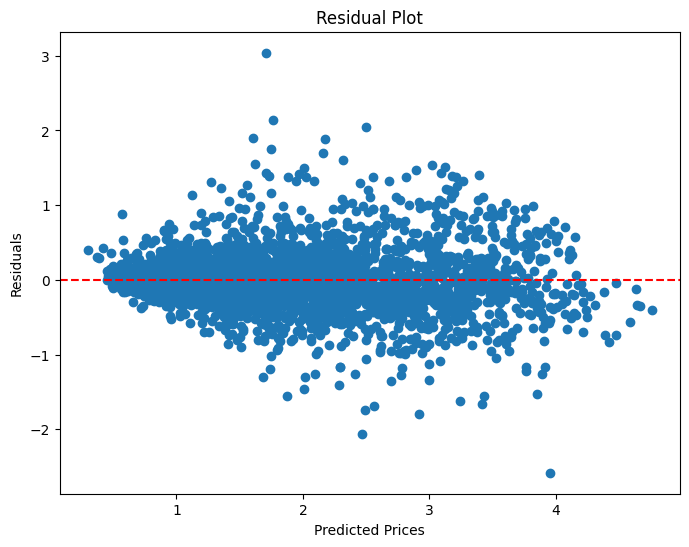

In [76]:
# prompt: visualise the results

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.show()


In [77]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression Mean Squared Error:", lr_mse)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
print("Decision Tree Regressor Mean Squared Error:", dt_mse)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest Regressor Mean Squared Error:", rf_mse)


Linear Regression Mean Squared Error: 0.3165222770544474
Decision Tree Regressor Mean Squared Error: 0.41483570793748076
Random Forest Regressor Mean Squared Error: 0.17868214653496545


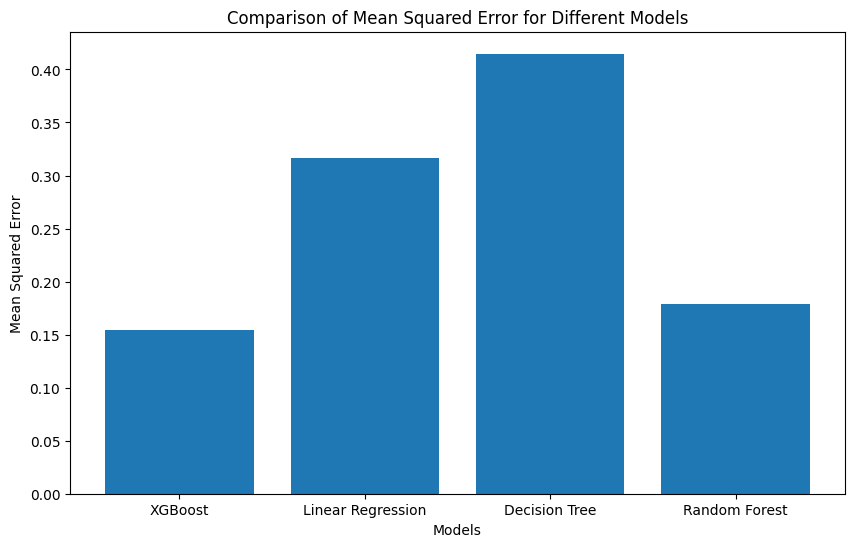

In [78]:
# prompt: help me viualise all

# Bar plot to compare MSE of different models
models = ['XGBoost', 'Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse, lr_mse, dt_mse, rf_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of Mean Squared Error for Different Models")
plt.show()


For this dataset our XGBoost model performed better compared to other models.

Now I want all of this in under one code so for the same reason I would use Kfolds , let's see an example below

In [79]:

from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the California housing dataset
cali = fetch_california_housing()
data = pd.DataFrame(cali.data, columns=cali.feature_names)
data['Price'] = cali.target

# Separate features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the models
models = {
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Perform K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    cv_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    results[name] = cv_scores

# Print the results
for name, scores in results.items():
    print(f"{name}: Mean MSE = {scores.mean()}, Standard Deviation = {scores.std()}")


XGBoost: Mean MSE = 0.2199897533755703, Standard Deviation = 0.009656959252220168
Linear Regression: Mean MSE = 0.5305724639238886, Standard Deviation = 0.021771332841710598
Decision Tree: Mean MSE = 0.5110100365108914, Standard Deviation = 0.012663625508244451
Random Forest: Mean MSE = 0.25351479043628317, Standard Deviation = 0.008554702888296154
